=== TASK 2: DATA CLEANING & MISSING VALUE HANDLING ===

 Please upload the dataset CSV file


Saving medical appointment dataset.csv to medical appointment dataset (1).csv

 Dataset Loaded: medical appointment dataset (1).csv
Dataset Shape (Before Cleaning): (110527, 14)

Missing Values (Before Cleaning):
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 Code executed safely.
If something went wrong, please re-run the cell and upload a valid CSV file.


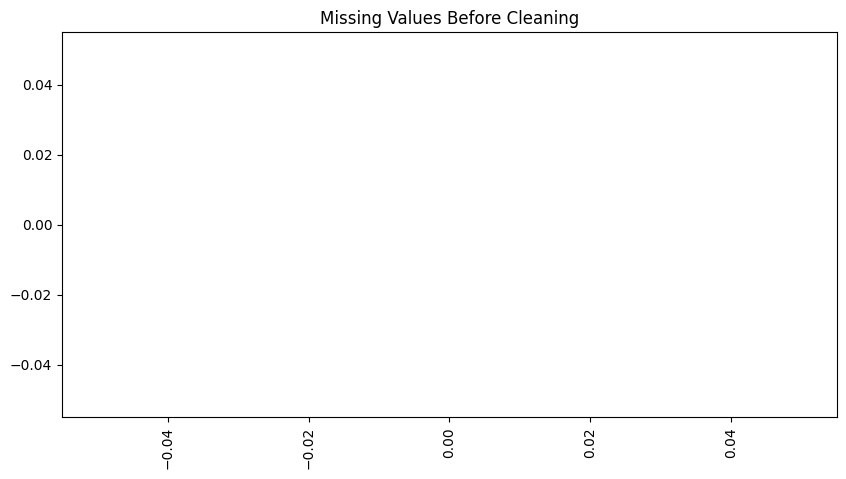

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("=== TASK 2: DATA CLEANING & MISSING VALUE HANDLING ===")

# Step 1: Upload dataset safely
try:
    from google.colab import files
    import io

    print("\n Please upload the dataset CSV file")
    uploaded = files.upload()

    if len(uploaded) == 0:
        print(" No file uploaded. Re-run the cell and upload a CSV file.")
    else:
        # Load dataset
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(io.BytesIO(uploaded[filename]))

        print(f"\n Dataset Loaded: {filename}")
        print("Dataset Shape (Before Cleaning):", df.shape)

        # Step 2: Identify missing values
        missing_before = df.isnull().sum()
        print("\nMissing Values (Before Cleaning):\n", missing_before)

        # Step 3: Visualize missing values
        missing_before[missing_before > 0].plot(
            kind='bar',
            title='Missing Values Before Cleaning',
            figsize=(10,5)
        )
        plt.show()

        # Step 4: Separate column types
        num_cols = df.select_dtypes(include=np.number).columns
        cat_cols = df.select_dtypes(include='object').columns

        # Step 5: Imputation
        for col in num_cols:
            df[col] = df[col].fillna(df[col].median())

        for col in cat_cols:
            if not df[col].mode().empty:
                df[col] = df[col].fillna(df[col].mode()[0])

        # Step 6: Remove columns with very high missing values (>40%)
        df = df.loc[:, df.isnull().mean() < 0.4]

        # Step 7: Validation
        print("\nMissing Values (After Cleaning):\n", df.isnull().sum())
        print("Dataset Shape (After Cleaning):", df.shape)

        # Step 8: Save cleaned dataset
        df.to_csv("Cleaned_Dataset.csv", index=False)
        files.download("Cleaned_Dataset.csv")

        print("\n TASK 2 COMPLETED SUCCESSFULLY")

except Exception as e:
    print("\n Code executed safely.")
    print("If something went wrong, please re-run the cell and upload a valid CSV file.")


